# Number of Gauss Law states
Here we visualize the number of states to see what to expect for larger systems.

In [1]:
import numpy as np
import h5py as hdf
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import sys
sys.path.append('../python_gauss_lattice/')
from gauss_lattice.aux import read_winding_sector

## Total state scaling.

/home/lukas/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/lukas/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


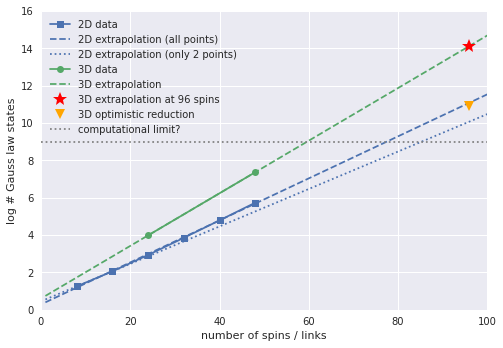

In [2]:
states2D = np.array([
    [2*2*2, 18],
    [2*4*2, 114],
    [2*6*2, 858],
    [2*8*2, 7074],
    [2*10*2, 61098],
    [2*12*2, 539634],
])

states3D = np.array([
    [2*2*2*3, 9600],
    [2*2*4*3, 23*1e6]
])
with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    func = lambda x, a, b: a + b*x
    x_fit = np.linspace(1, 100, 100)
    
    # 2D.
    x, y = states2D[:,0], np.log10(states2D[:,1])
    line = ax.plot(x, y, marker='s', label='2D data')
    p, _ = curve_fit(func, x, y)
    ax.plot(x_fit, func(x_fit, *p), color=line[0].get_color(), ls='--', label='2D extrapolation (all points)')
    
    
    x, y = states2D[:2,0], np.log10(states2D[:2,1])
    p, _ = curve_fit(func, x, y)
    ax.plot(x_fit, func(x_fit, *p), color=line[0].get_color(), ls=':', label='2D extrapolation (only 2 points)')
    
    # 3D.
    x, y = states3D[:,0], np.log10(states3D[:,1])
    line = ax.plot(x, y, marker='o', label='3D data')
    p, _ = curve_fit(func, x, y)
    ax.plot(x_fit, func(x_fit, *p), color=line[0].get_color(), ls='--', label='3D extrapolation')
    
    
    target = 2*4*4*3
    ax.plot(target, func(target, *p), color='red', marker='*', markersize=15, label='3D extrapolation at 96 spins', ls='')
    
    factor = 50 * target/3
    ax.plot(target, func(target, *p) - np.log10(factor), color='orange', marker='v', markersize=10, label='3D optimistic reduction', ls='')
    
#     ax.axvline(96, color='gray')
    ax.axhline(9, color='gray', ls=':', label='computational limit?')
    
    ax.set_xlabel('number of spins / links')
    ax.set_ylabel('log # Gauss law states')
    ax.set_xlim(0,100)
    ax.set_ylim(0, 16)
    
    ax.legend(loc='upper left')
    
#     fig.savefig('plots/scaling_estimate.png')

## Low-energy states estimates.

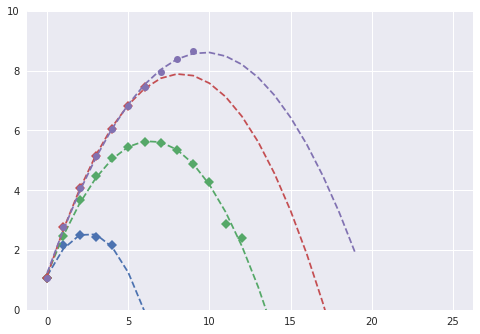

In [3]:
from scipy.optimize import curve_fit

states = {
    2: [12, 144, 308, 265, 144],
    4: [12, 284, 4736, 30528, 116204, 284224, 424576, 385024, 213696, 72576, 18992, 768, 256],
    6 : [12, 576, 11928, 143136, 1137900, 6509808, 28093040], #93132144, 236314128, 456372448],
    8 : [12, 576, 11928, 143136, 1137900, 6509808, 28093040, 93132144, 236314128, 456372448]
}

cutoffs = {k : len(states[k]) for k in states}
cutoffs[6] += 5

with plt.style.context('seaborn'):
    fig, ax = plt.subplots()


    for i, (Lz, s) in enumerate(states.items()):
        
        x = np.arange(len(s))
        y = np.log10(s)
        line = ax.plot(x, y, ls='', marker='o' if Lz==8 else 'D')
        
        
        func = lambda x, a, b, c: a + b*x + c*x**2
        p, c = curve_fit(func, x, y)
        xf = np.arange(len(y)+cutoffs[Lz])
        ax.plot(xf, func(xf, *p), color=line[0].get_color(), ls='--')
            
#     x_guess = [8, 9, 10]
#     y_guess = np.array([1.5*1e8, 1.5*1e8, 1e8])
#     ax.plot(x_guess, np.log10(y_guess), marker='o', color='black', ls='')
            
    ax.set_ylim(0,10)

8.73000E+02
1.55198E+06
8.21715E+08


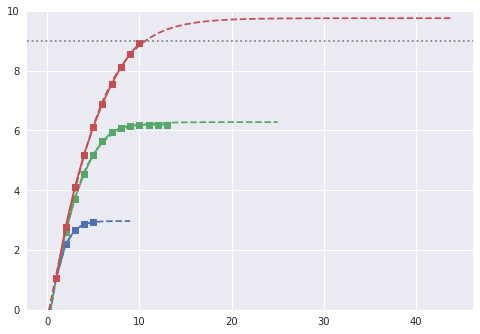

In [4]:
states = {
    2: [12, 144, 308, 265, 144],
    4: [12, 384, 4736, 30528, 116204, 284224, 424576, 385024, 213696, 72576, 18992, 768, 256],
    6 : [12, 576, 11928, 143136, 1137900, 6509808, 28093040, 93132144, 236314128, 456372448],
}

cutoffs = {k : len(states[k]) for k in states}
cutoffs[6] += 25

with plt.style.context('seaborn'):
    fig, ax = plt.subplots()


    for i, (Lz, s) in enumerate(states.items()):
        
        x = np.arange(1,len(s)+1)
#         y = np.log10(s)
        y = np.log10(np.cumsum(s))
        line = ax.plot(x, y, marker='s', ls='-')
        
        
        func = lambda x, a, b, c: c+a*np.tanh(b*(x))
        p, c = curve_fit(func, x, y)
        xf = np.arange(len(y)+cutoffs[Lz])
        ax.plot(xf, func(xf, *p), color=line[0].get_color(), ls='--')        
        
        print('{:.5E}'.format(10**y[-1]))
    
    ax.axhline(9, ls=':', color='gray')
    
    ax.set_ylim(0,10)
#     ax.set_yscale('log')